In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline

<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [3]:
a=-1
b=2
y=a*X+b
y

array([  2.        ,   1.59183673,   1.18367347,   0.7755102 ,
         0.36734694,  -0.04081633,  -0.44897959,  -0.85714286,
        -1.26530612,  -1.67346939,  -2.08163265,  -2.48979592,
        -2.89795918,  -3.30612245,  -3.71428571,  -4.12244898,
        -4.53061224,  -4.93877551,  -5.34693878,  -5.75510204,
        -6.16326531,  -6.57142857,  -6.97959184,  -7.3877551 ,
        -7.79591837,  -8.20408163,  -8.6122449 ,  -9.02040816,
        -9.42857143,  -9.83673469, -10.24489796, -10.65306122,
       -11.06122449, -11.46938776, -11.87755102, -12.28571429,
       -12.69387755, -13.10204082, -13.51020408, -13.91836735,
       -14.32653061, -14.73469388, -15.14285714, -15.55102041,
       -15.95918367, -16.36734694, -16.7755102 , -17.18367347,
       -17.59183673, -18.        ])

#### Plot X vs. y

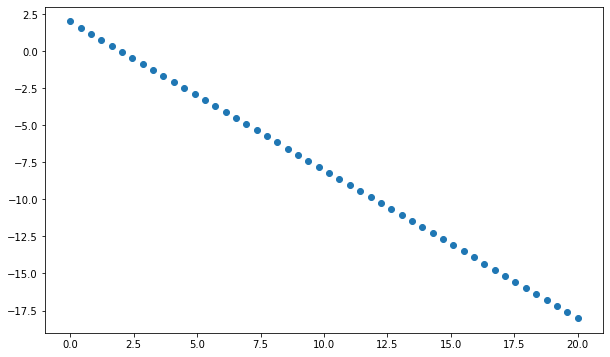

In [4]:
plt.figure(figsize=(10,6))
plt.scatter(X, y);

## Adagrad

In [8]:
def Adagrad(X, y, alpha, epsilon=10e-8, epochs=300):
    theta_0s, theta_1s = [], []
    all_hx, loss = [], []
    theta_0, theta_1 = 0, 0
    v0, v1 = 0, 0
    m = len(y)
    
    for i in tqdm(range(epochs)):
#         print(f'****************** Iteration {i} ********************\n')
        theta_0s.append(theta_0)
        theta_1s.append(theta_1)
        
        h_x = theta_0 + theta_1*X
        all_hx.append(h_x)
#         print('h(x) : ', h_x)
        
        error_vector = h_x - y
        
        MSE = np.sum(error_vector**2)/(2*m)
        loss.append(MSE)
#         print('\nj = ', MSE)

        d_theta_0 = (np.sum(h_x - y))/m
        d_theta_1 = (np.sum((h_x - y) *X))/m
        
        gradient_vector = np.array([d_theta_0, d_theta_1])
#         print('\nGradient Vector : \n', gradient_vector)

        gradient_vec_norm = np.linalg.norm(gradient_vector)
#         print('\n Gradient Vector Norm : ', gradient_vec_norm)
        
        if i>0:
            if gradient_vec_norm <=0.001 or (np.abs(loss[-1] - loss[-2]))<=0.001:
                print('****************** Training Report ********************')
                print(f'Gradient Descent converged after {i} iterations')
                print('theta_0_Opt : ', theta_0)
                print('theta_1_Opt : ', theta_1)
#                 print('\nError Vector :\n', error_vector)
                print('Cost = ', MSE)
#                 print('h(x) = y_predict: \n', h_x)
#                 print('y_actual : ', y)

                break

        
        
        v0 = v0 + d_theta_0**2
        v1 = v1 + d_theta_1**2
        
        theta_0 = theta_0 - (alpha*d_theta_0) / (np.sqrt(v0) + epsilon)
        theta_1 = theta_1 - (alpha*d_theta_1) / (np.sqrt(v1) + epsilon)
        
    return theta_0s, theta_1s, loss, all_hx

In [6]:
def plot_visuals(X, y, losses, thetas_0, thetas_1, all_hx):
    plt.figure(figsize=(15,35))

    plt.subplot(511)
    plt.plot(losses, marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid('True');

    plt.subplot(512)
    plt.plot(thetas_0, losses, marker='o')
    plt.xlabel('Theta 0')
    plt.ylabel('Loss')
    #plt.title('Learning Rate = 0.0005')
    plt.grid('True')

    plt.subplot(513)
    plt.plot(thetas_1, losses, marker='o')
    plt.xlabel('Theta 1',)
    plt.ylabel('Loss')
    #plt.title('Learning Rate = 0.0005')
    plt.grid('True')

    plt.subplot(514)
    plt.scatter(X, y)
    for h_x in all_hx:
        plt.plot(X, h_x, 'r')
    
    h_x = thetas_0[-1] + thetas_1[-1]*X
    plt.subplot(515)
    plt.scatter(X, y)
    plt.plot(X, h_x, 'r');

##### The following results uses alpha = 0.05, epsilon =  1e-08, and max. iterations = 500.

In [9]:
theta_0s, theta_1s, loss, all_hx = Adagrad(X, y, alpha=0.05, epsilon=1e-08, epochs=500)

  0%|                                                                                          | 0/500 [00:00<?, ?it/s]

****************** Training Report ********************
Gradient Descent converged after 265 iterations
theta_0_Opt :  -0.5961288035852517
theta_1_Opt :  -0.7876163789447848
Cost =  0.8939950879138313


In [11]:
from sklearn.metrics import r2_score
h_x = theta_0s[-1] + theta_1s[-1]*X
r2_score(y, h_x)

0.9484638125790851

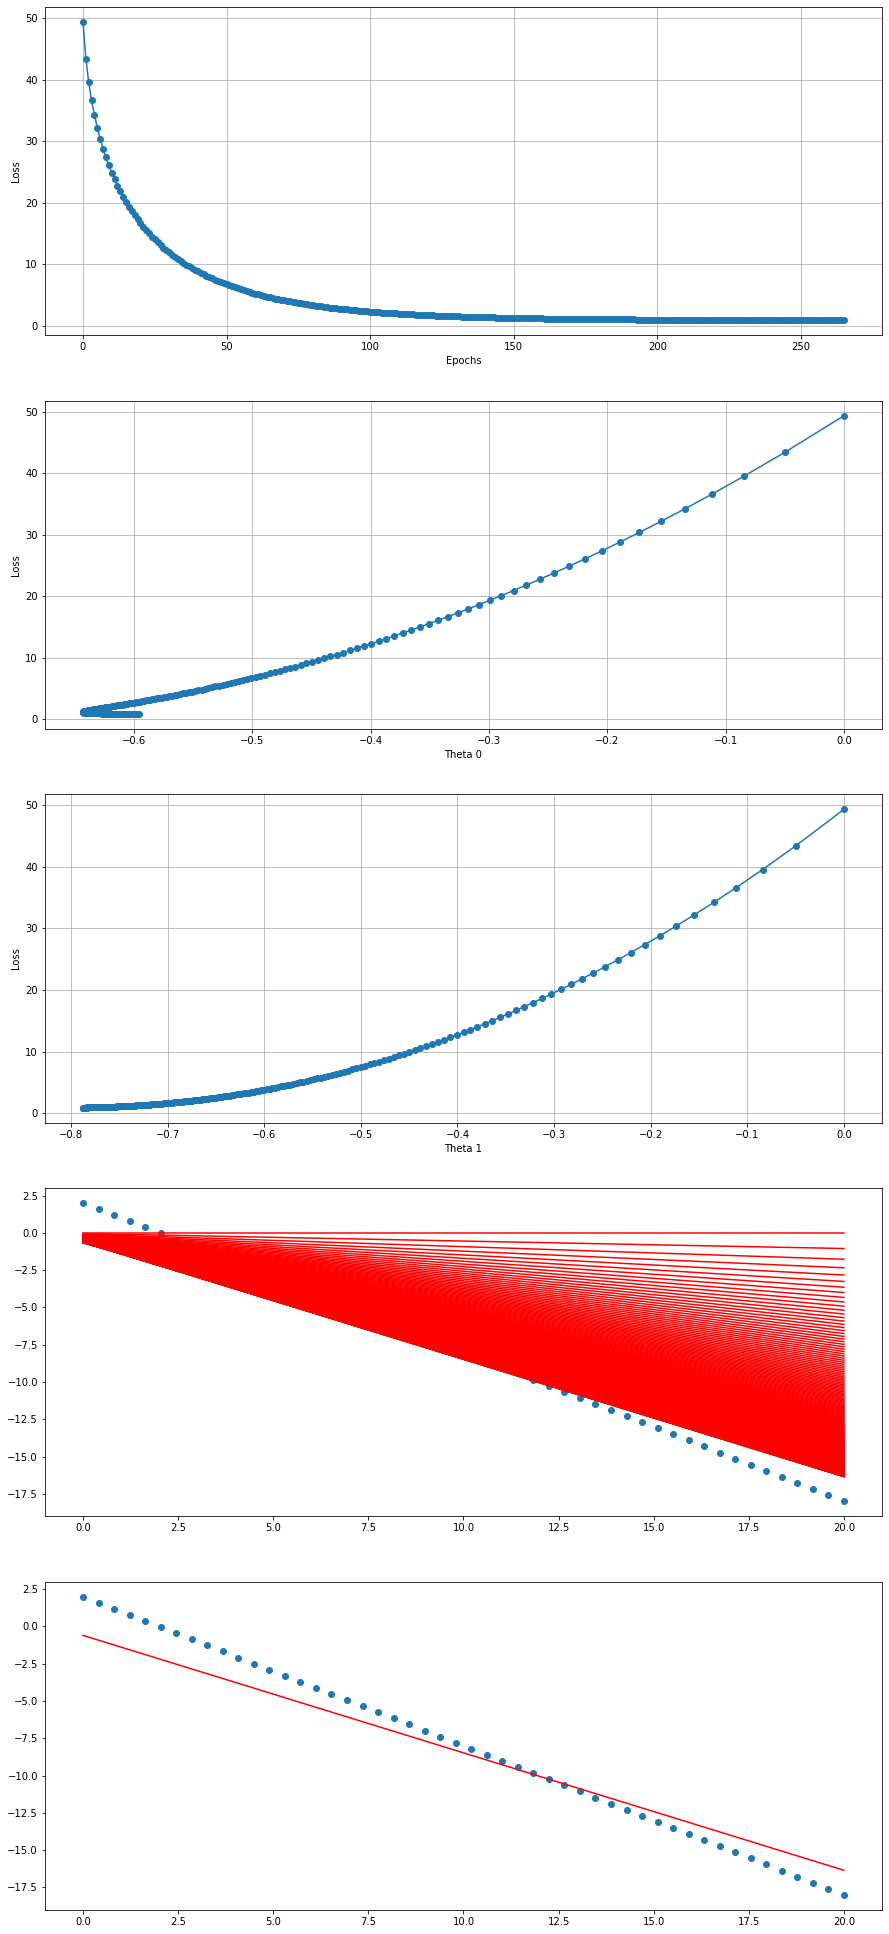

In [12]:
plot_visuals(X, y, loss, theta_0s, theta_1s, all_hx)

##### The following results uses alpha = 0.005, epsilon =  1e-08, and max. iterations = 5000.

In [13]:
theta_0s, theta_1s, loss, all_hx = Adagrad(X, y, alpha=0.005, epsilon=1e-08, epochs=5000)

100%|███████████████████████████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 17494.78it/s]


In [14]:
r2_score(y, all_hx[-1])

0.7095974929894115

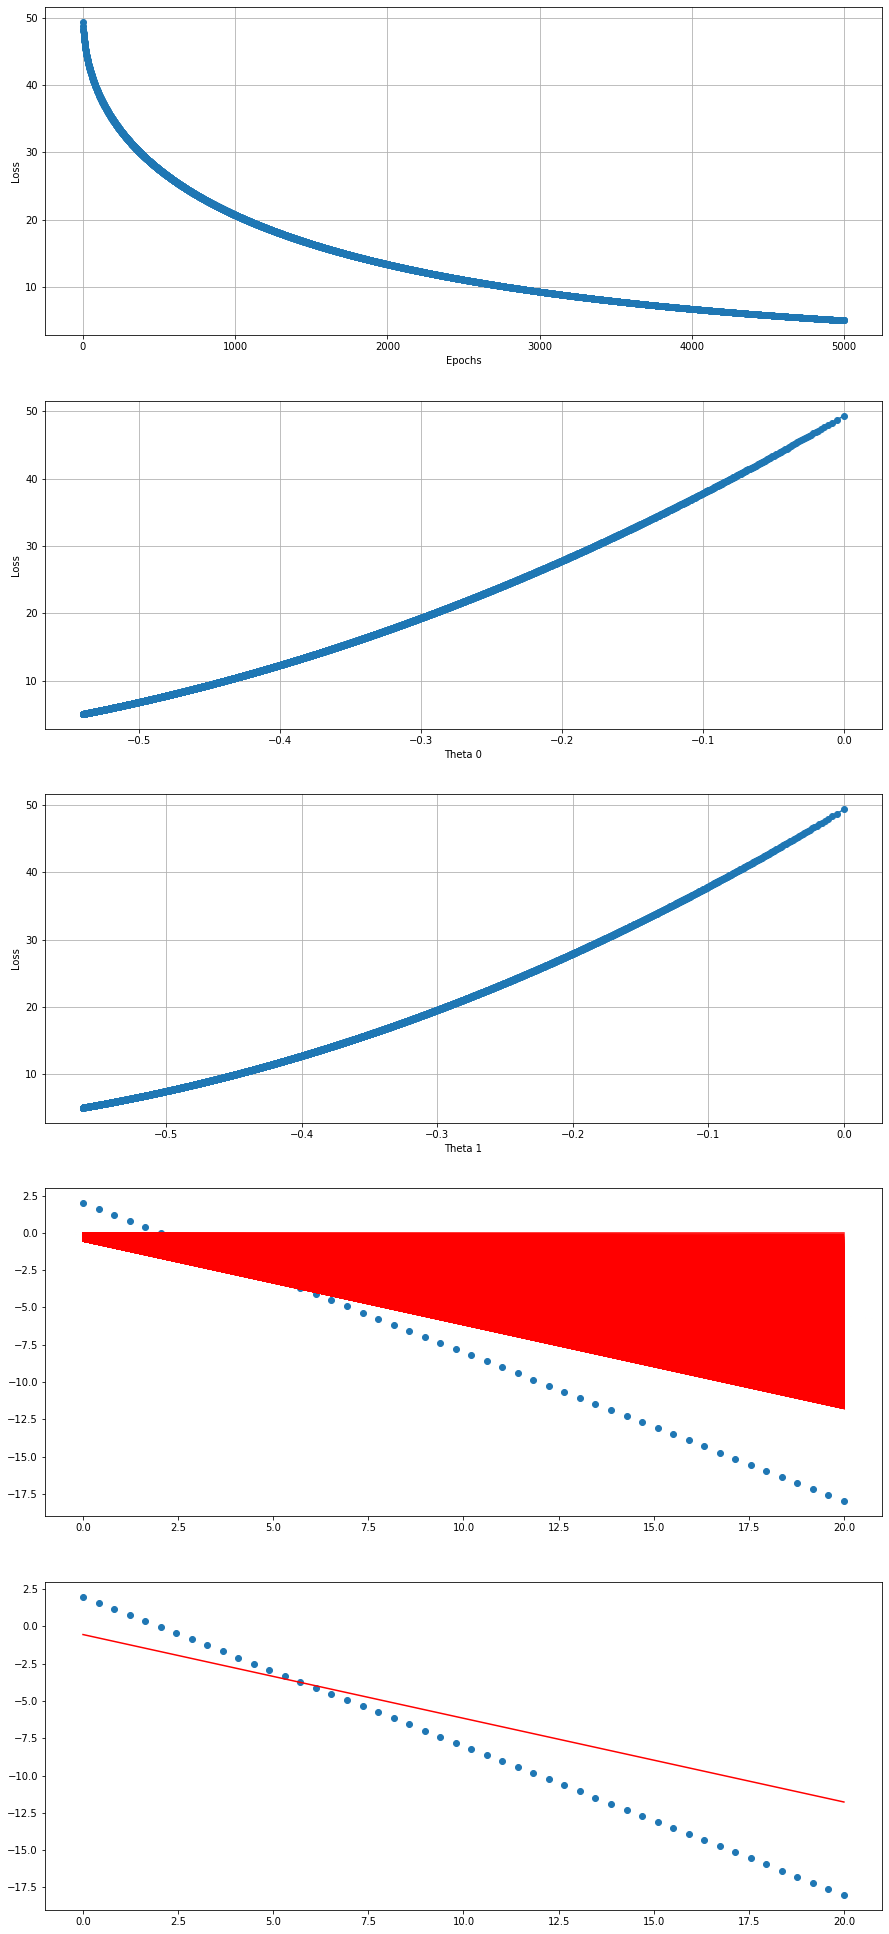

In [15]:
plot_visuals(X, y, loss, theta_0s, theta_1s, all_hx)

##### The following results uses alpha = 0.0005, epsilon =  1e-08, and max. iterations = 5000.

In [16]:
theta_0s, theta_1s, loss, all_hx = Adagrad(X, y, alpha=0.0005, epsilon=1e-08, epochs=5000)

 41%|██████████████████████████████▍                                            | 2033/5000 [00:00<00:00, 12753.14it/s]

****************** Training Report ********************
Gradient Descent converged after 3106 iterations
theta_0_Opt :  -0.05427715912241716
theta_1_Opt :  -0.054339378913341445
Cost =  42.91015419990101


In [17]:
r2_score(y, all_hx[-1])

-1.4736441832884104

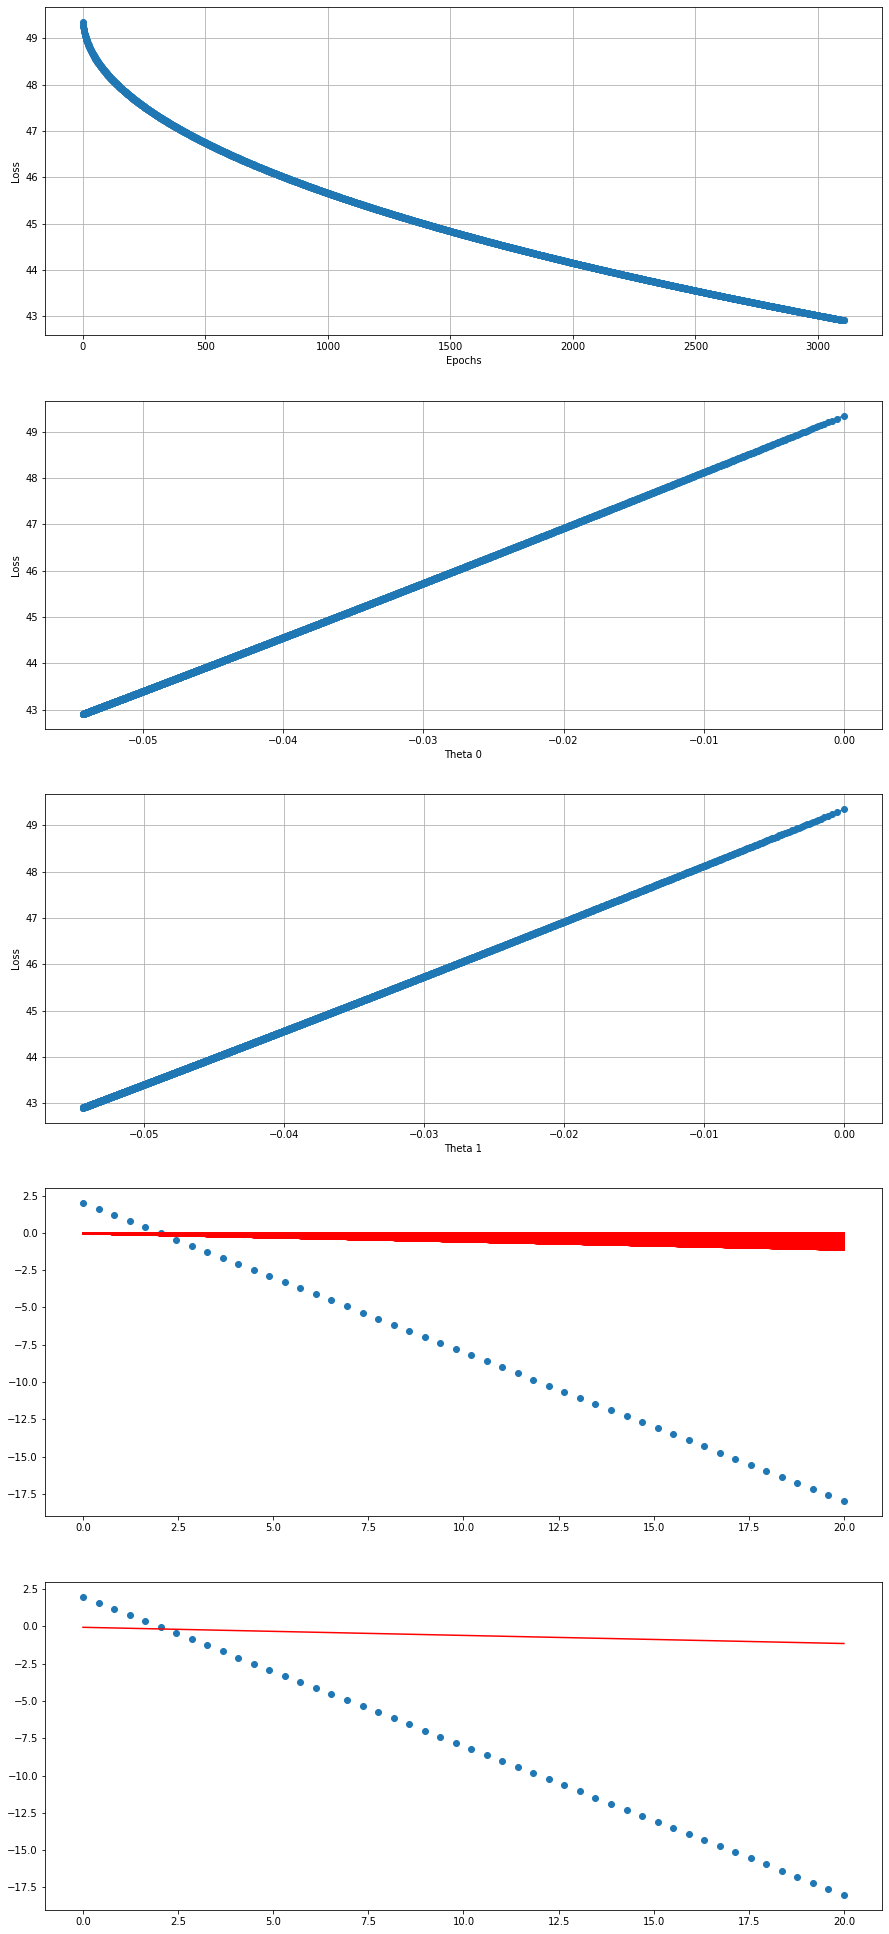

In [18]:
plot_visuals(X, y, loss, theta_0s, theta_1s, all_hx)

## RMSProp

In [19]:
def RMSProp(X, y, alpha, beta, epsilon=10e-8, epochs=300):
    theta_0s, theta_1s = [], []
    all_hx, loss = [], []
    theta_0, theta_1 = 0, 0
    v0, v1 = 0, 0
    m = len(y)
    
    for i in range(epochs):
#         print(f'****************** Iteration {i} ********************\n')
        theta_0s.append(theta_0)
        theta_1s.append(theta_1)
        
        h_x = theta_0 + theta_1*X
        all_hx.append(h_x)
#         print('h(x) : ', h_x)
        
        error_vector = h_x - y
        
        MSE = np.sum(error_vector**2)/(2*m)
        loss.append(MSE)
#         print('\nj = ', MSE)

        d_theta_0 = (np.sum(h_x - y))/m
        d_theta_1 = (np.sum((h_x - y) *X))/m
        
        gradient_vector = np.array([d_theta_0, d_theta_1])
#         print('\nGradient Vector : \n', gradient_vector)

        gradient_vec_norm = np.linalg.norm(gradient_vector)
#         print('\n Gradient Vector Norm : ', gradient_vec_norm)
        
        if i>0:
            if gradient_vec_norm <=0.001 or (np.abs(loss[-1] - loss[-2]))<=0.001:
                print('****************** Training Report ********************')
                print(f'Gradient Descent converged after {i} iterations')
                print('theta_0_Opt : ', theta_0)
                print('theta_1_Opt : ', theta_1)
#                 print('\nError Vector :\n', error_vector)
                print('Cost = ', MSE)
#                 print('h(x) = y_predict: \n', h_x)
#                 print('y_actual : ', y)

                break

        
        
        v0 = beta*v0 + (1-beta)*d_theta_0**2
        v1 = beta*v1 + (1-beta)*d_theta_1**2
        
        theta_0 = theta_0 - (alpha*d_theta_0) / (np.sqrt(v0) + epsilon)
        theta_1 = theta_1 - (alpha*d_theta_1) / (np.sqrt(v1) + epsilon)
        
    return theta_0s, theta_1s, loss, all_hx

##### The following results uses alpha = 0.05, beta = 0.9, epsilon =  1e-08, and max. iterations = 500.

In [20]:
theta_0s, theta_1s, loss, all_hx = RMSProp(X, y, alpha=0.05, beta=0.9, epsilon=1e-08, epochs=500)

****************** Training Report ********************
Gradient Descent converged after 99 iterations
theta_0_Opt :  1.7028238513798315
theta_1_Opt :  -0.97965699227441
Cost =  0.011572984760870398


In [21]:
r2_score(y, all_hx[-1])

0.9993328514667263

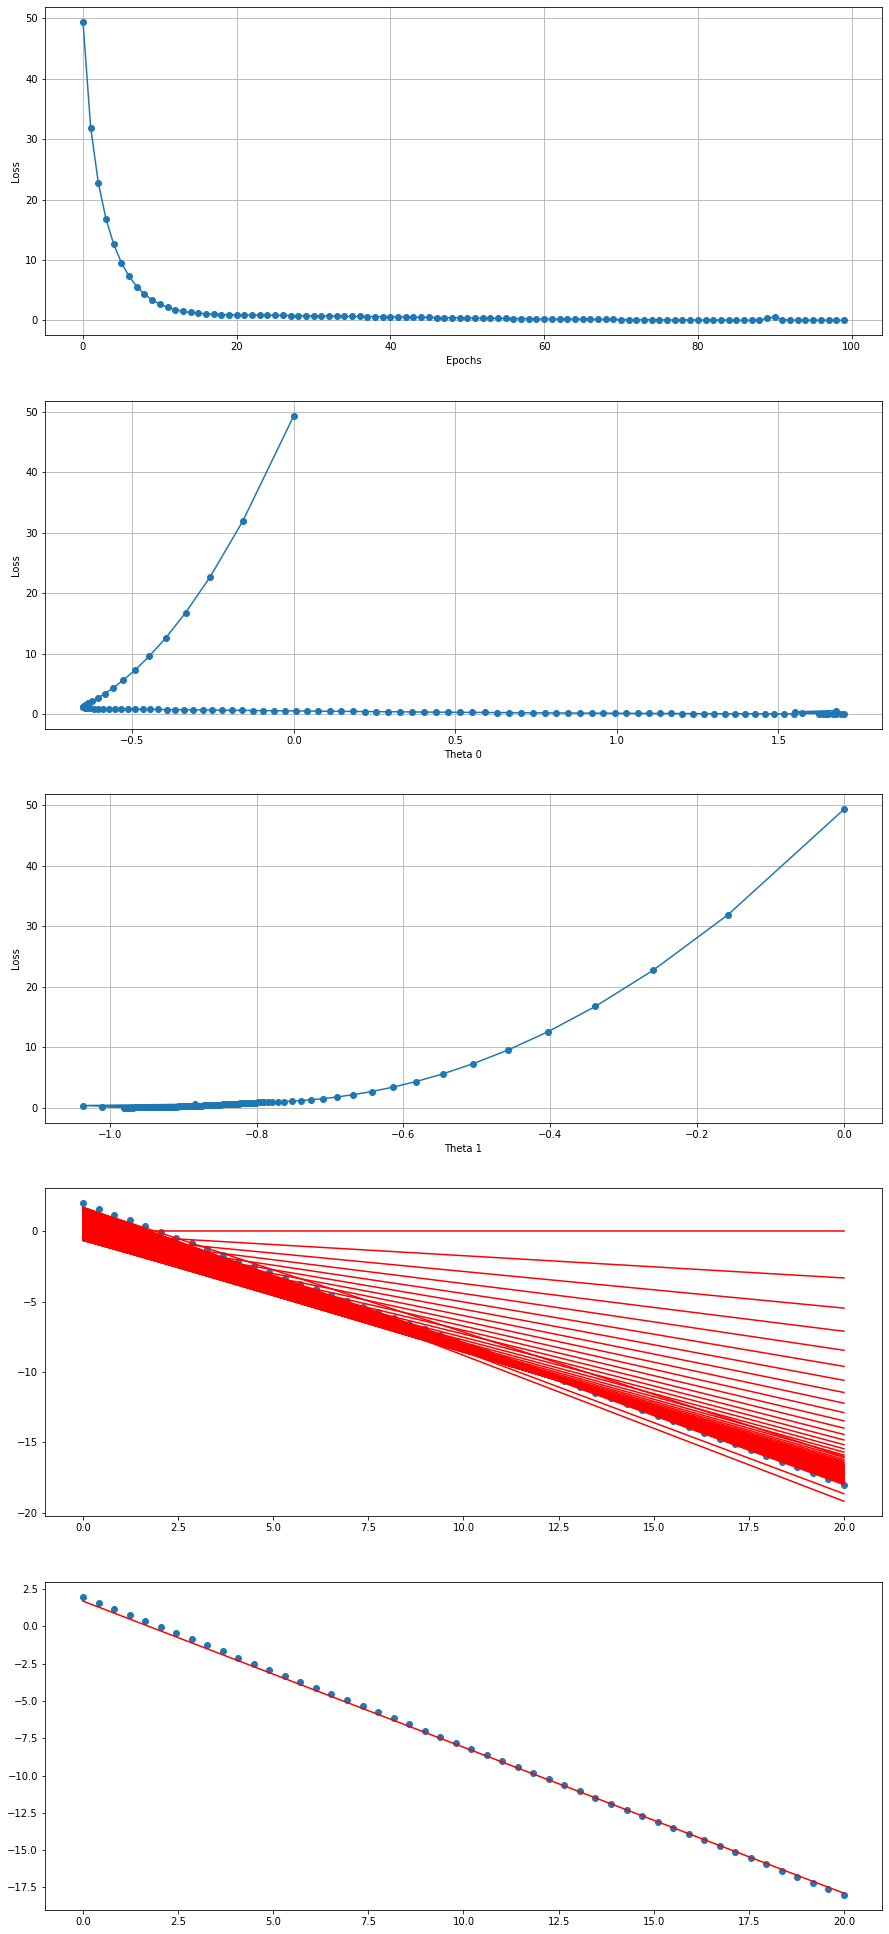

In [22]:
plot_visuals(X, y, loss, theta_0s, theta_1s, all_hx)

##### The following results uses alpha = 0.005, beta = 0.9, epsilon =  1e-08, and max. iterations = 5000.

In [23]:
theta_0s, theta_1s, loss, all_hx = RMSProp(X, y, alpha=0.005, beta=0.9, epsilon=1e-08, epochs=5000)

****************** Training Report ********************
Gradient Descent converged after 539 iterations
theta_0_Opt :  1.1696398899406466
theta_1_Opt :  -0.9356526608266086
Cost =  0.08928971151651491


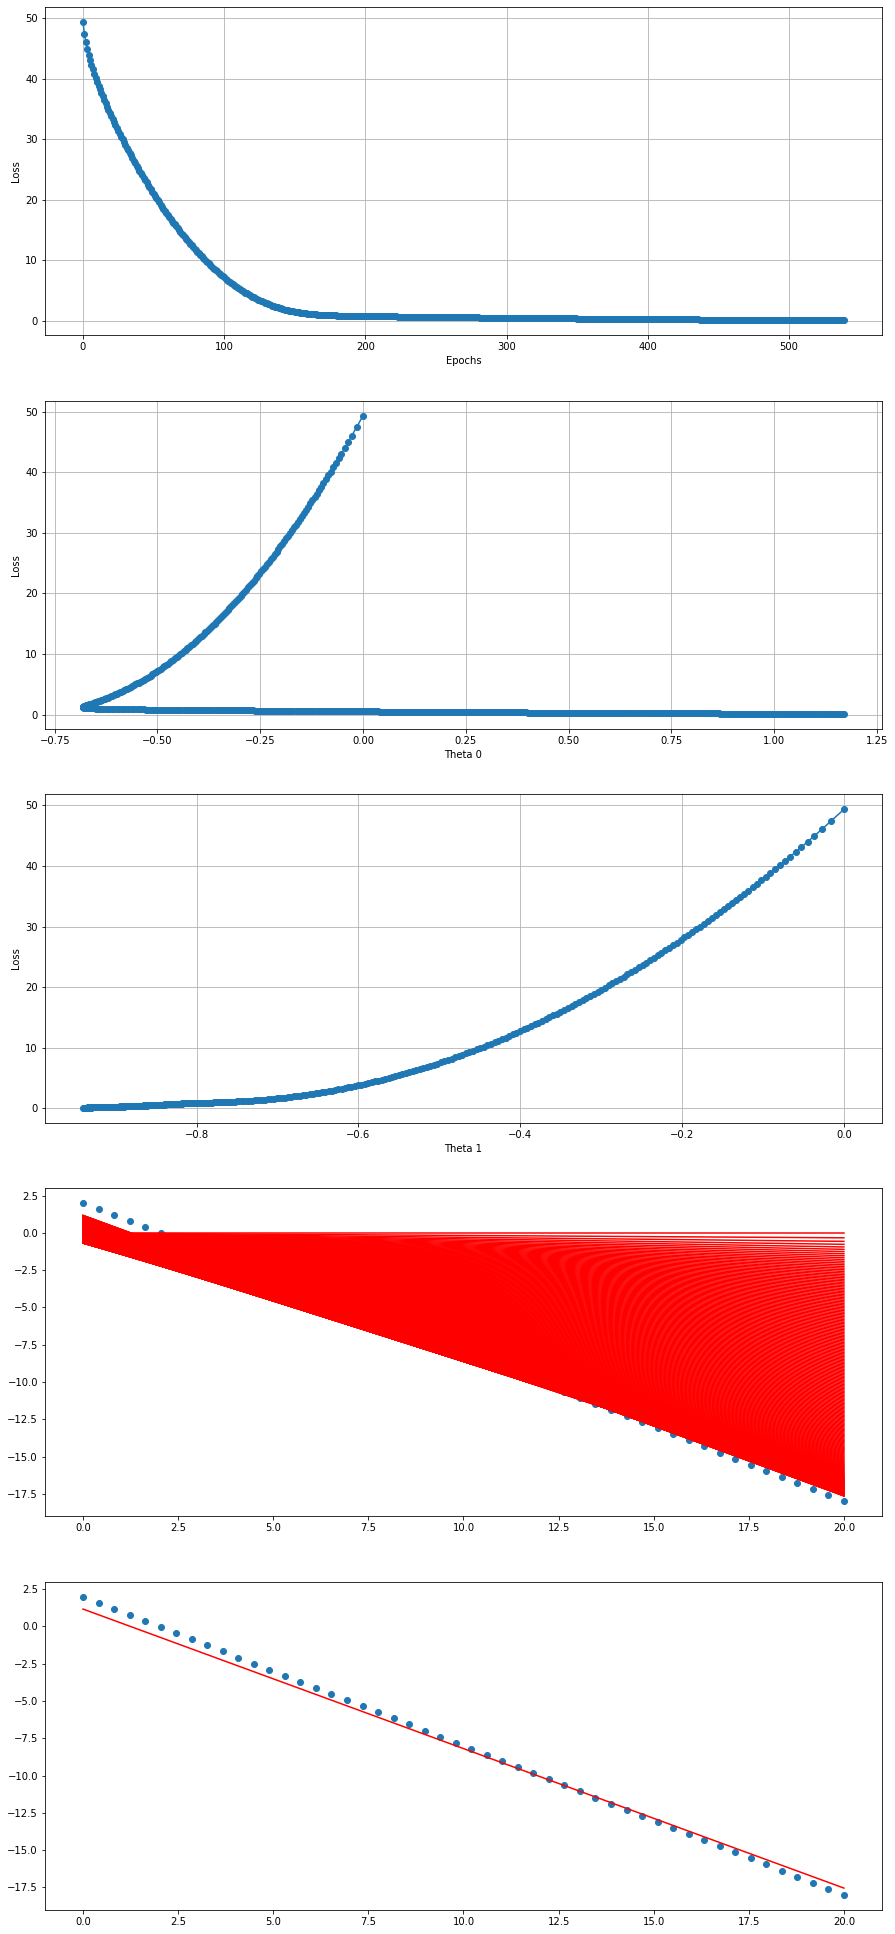

In [24]:
plot_visuals(X, y, loss, theta_0s, theta_1s, all_hx)

##### The following results uses alpha = 0.0005, beta = 0.9, epsilon =  1e-08, and max. iterations = 5000.

In [25]:
theta_0s, theta_1s, loss, all_hx = RMSProp(X, y, alpha=0.0005, beta=0.9, epsilon=1e-08, epochs=5000)

****************** Training Report ********************
Gradient Descent converged after 1609 iterations
theta_0_Opt :  -0.6390198509170809
theta_1_Opt :  -0.7908779506023
Cost =  0.9086589414595336


In [26]:
r2_score(y, all_hx[-1])

0.9476184845511563

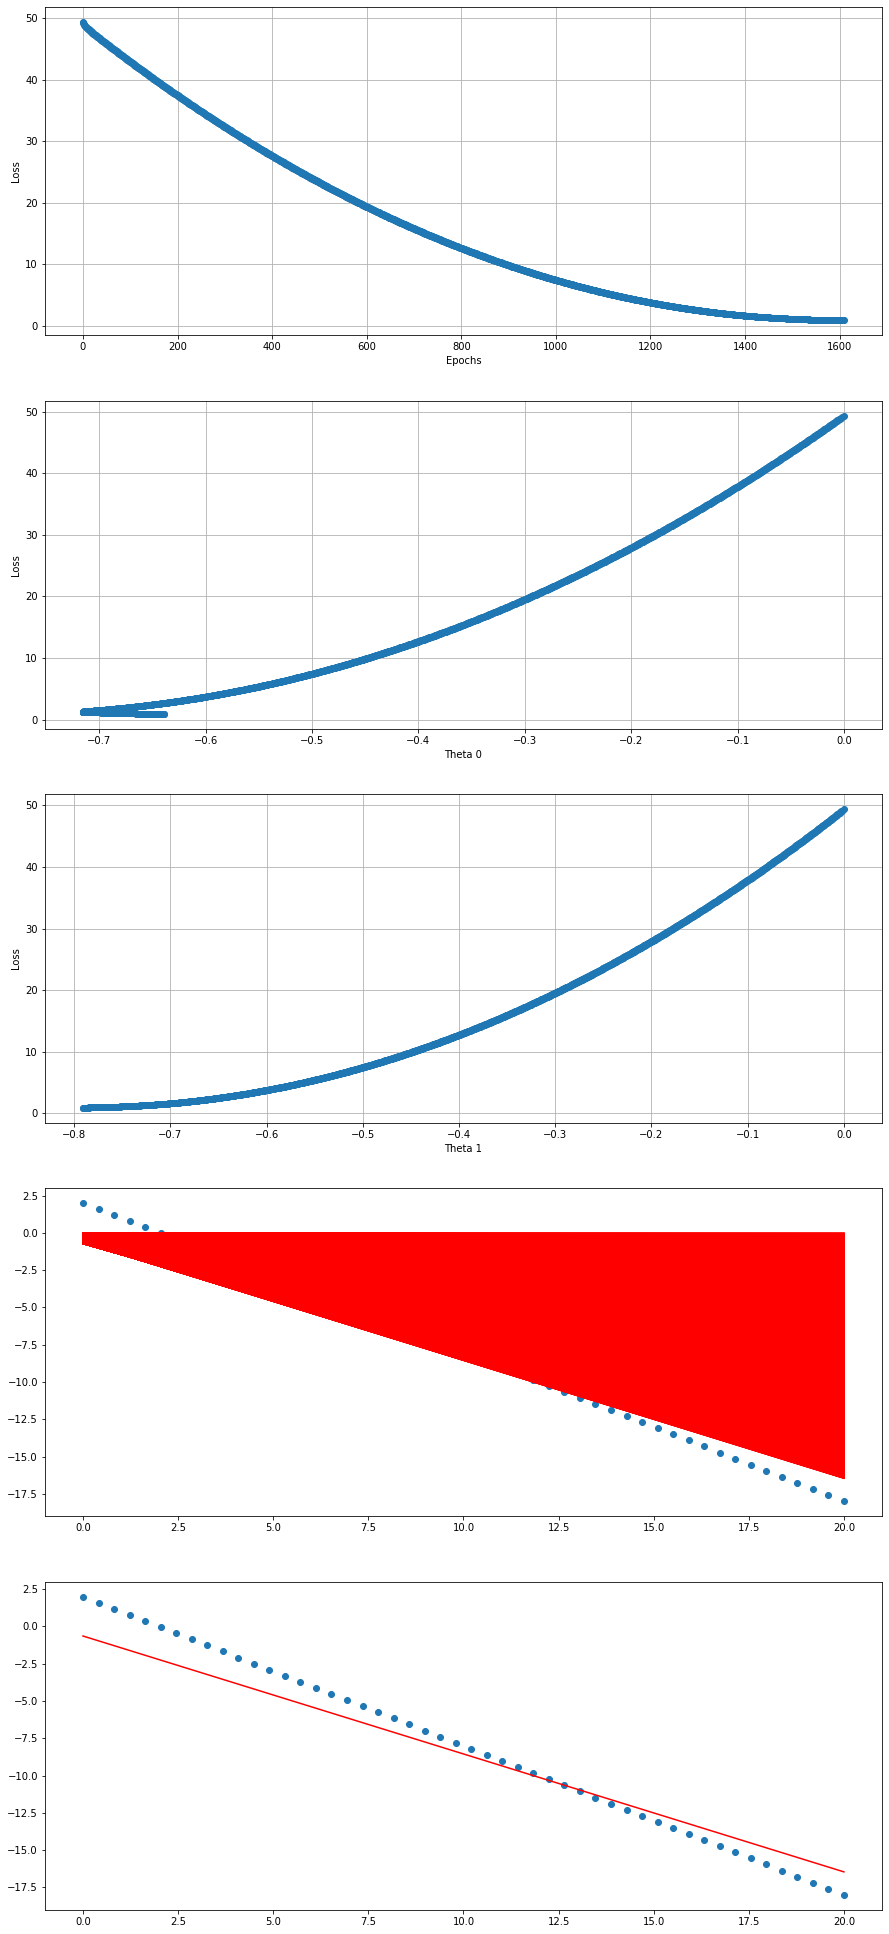

In [27]:
plot_visuals(X, y, loss, theta_0s, theta_1s, all_hx)

## Adam

In [28]:
def Adam(X, y, alpha, beta1, beta2, epsilon=10e-8, epochs=300):
    theta_0s, theta_1s = [], []
    all_hx, loss = [], []
    theta_0, theta_1 = 0, 0
    v0, v1 = 0, 0
    m0, m1 = 0, 0
    m = len(y)
    
    for i in range(epochs):
#         print(f'****************** Iteration {i} ********************\n')
        theta_0s.append(theta_0)
        theta_1s.append(theta_1)
        
        h_x = theta_0 + theta_1*X
        all_hx.append(h_x)
#         print('h(x) : ', h_x)
        
        error_vector = h_x - y
        
        MSE = np.sum(error_vector**2)/(2*m)
        loss.append(MSE)
#         print('\nj = ', MSE)

        d_theta_0 = (np.sum(h_x - y))/m
        d_theta_1 = (np.sum((h_x - y) *X))/m
        
        gradient_vector = np.array([d_theta_0, d_theta_1])
#         print('\nGradient Vector : \n', gradient_vector)

        gradient_vec_norm = np.linalg.norm(gradient_vector)
#         print('\n Gradient Vector Norm : ', gradient_vec_norm)
        
        if i>0:
            if gradient_vec_norm <=0.001 or (np.abs(loss[-1] - loss[-2]))<=0.001:
                print('****************** Training Report ********************')
                print(f'Gradient Descent converged after {i} iterations')
                print('theta_0_Opt : ', theta_0)
                print('theta_1_Opt : ', theta_1)
#                 print('\nError Vector :\n', error_vector)
                print('Cost = ', MSE)
#                 print('h(x) = y_predict: \n', h_x)
#                 print('y_actual : ', y)

                break
        t=i+1
        m0 = beta1*m0 + (1-beta1)*d_theta_0
        m1 = beta1*m1 + (1-beta1)*d_theta_1
        
        v0 = v0*beta2 + (1-beta2)*(d_theta_0**2)
        v1 = v1*beta2 + (1-beta2)*(d_theta_1**2)
        
        #Bais Correction
        m_hat_0 = m0/(1-(beta1**t))
        v_hat_0 = v0/(1-(beta2**t))
        
        m_hat_1 = m1/(1-(beta1**t))
        v_hat_1 = v1/(1-(beta2**t))
        
        #Updating Thetas
        theta_0 = theta_0 - (alpha*m_hat_0) / (np.sqrt(v_hat_0) + epsilon)
        theta_1 = theta_1 - (alpha*m_hat_1) / (np.sqrt(v_hat_1) + epsilon)
        
    return theta_0s, theta_1s, loss, all_hx

##### The following results uses alpha = 0.05, beta1 = 0.2, beta2 = 0.7, epsilon =  1e-08, and max. iterations = 500.

In [29]:
theta_0s, theta_1s, loss, all_hx = Adam(X, y, alpha=0.05, beta1=0.2, beta2=0.7, epsilon=1e-08, epochs=500)

****************** Training Report ********************
Gradient Descent converged after 82 iterations
theta_0_Opt :  1.6807367025486826
theta_1_Opt :  -0.9678696681600729
Cost =  0.017910335751351467


In [30]:
r2_score(y, all_hx[-1])

0.9989675218213927

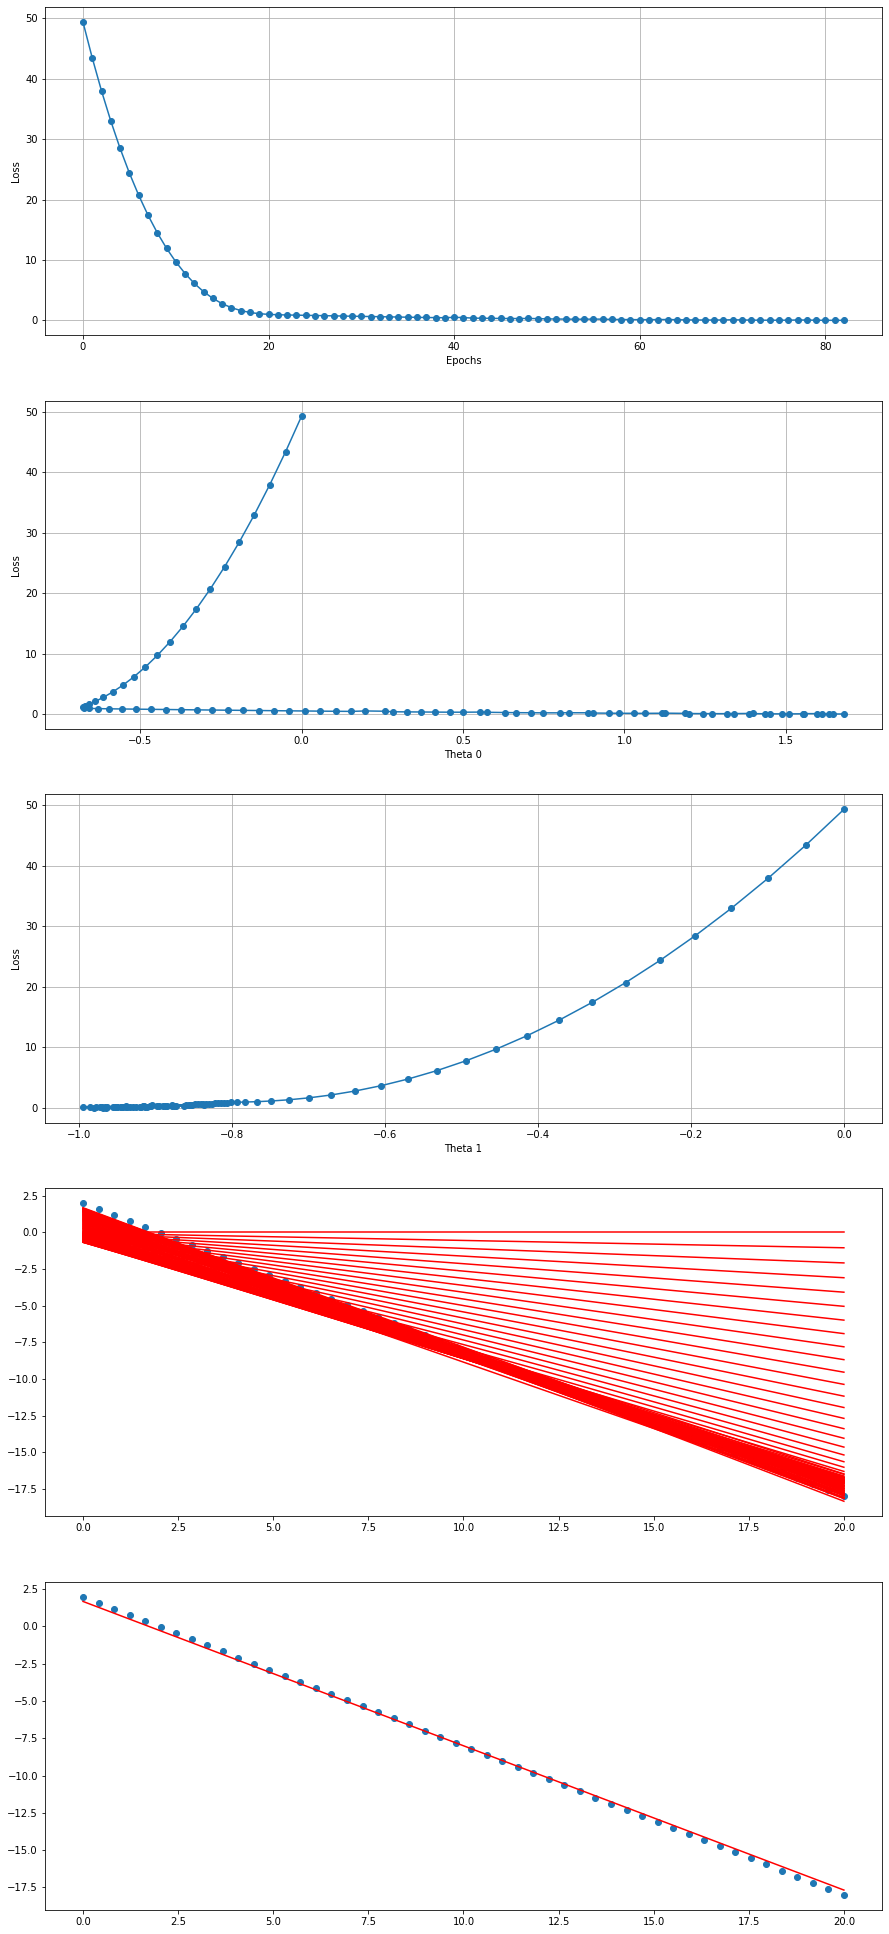

In [31]:
plot_visuals(X, y, loss, theta_0s, theta_1s, all_hx)

##### The following results uses alpha = 0.005, beta1 = 0.5, beta2 = 0.8, epsilon =  1e-08, and max. iterations = 500.

In [32]:
theta_0s, theta_1s, loss, all_hx = Adam(X, y, alpha=0.005, beta1=0.5, beta2=0.8, epsilon=1e-08, epochs=500)

In [33]:
r2_score(y, all_hx[-1])

0.992630779461015

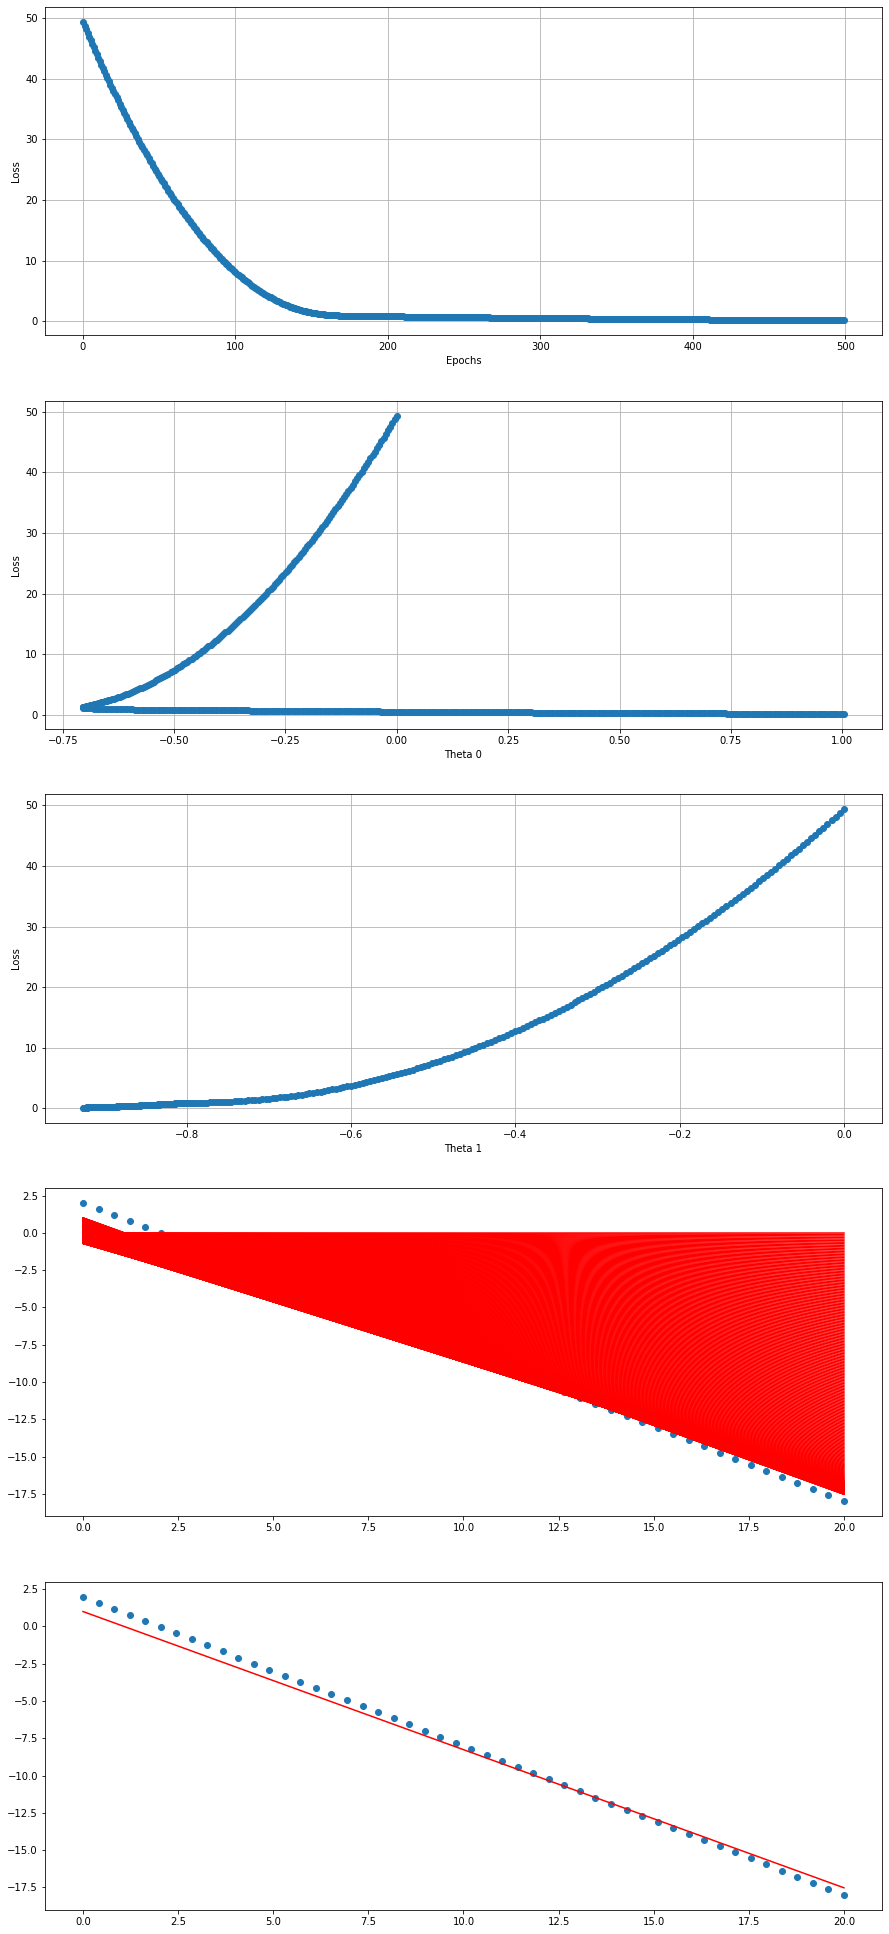

In [34]:
plot_visuals(X, y, loss, theta_0s, theta_1s, all_hx)

##### The following results uses alpha = 0.0005, beta1 = 0.8, beta2 = 0.8, epsilon =  1e-08, and max. iterations = 5000.

In [35]:
theta_0s, theta_1s, loss, all_hx = Adam(X, y, alpha=0.0005, beta1=0.8, beta2=0.8, epsilon=1e-08, epochs=5000)

****************** Training Report ********************
Gradient Descent converged after 1584 iterations
theta_0_Opt :  -0.6672590761549853
theta_1_Opt :  -0.7918098466049496
Cost =  0.9231925215171504


In [36]:
r2_score(y, all_hx[-1])

0.9467806664066584

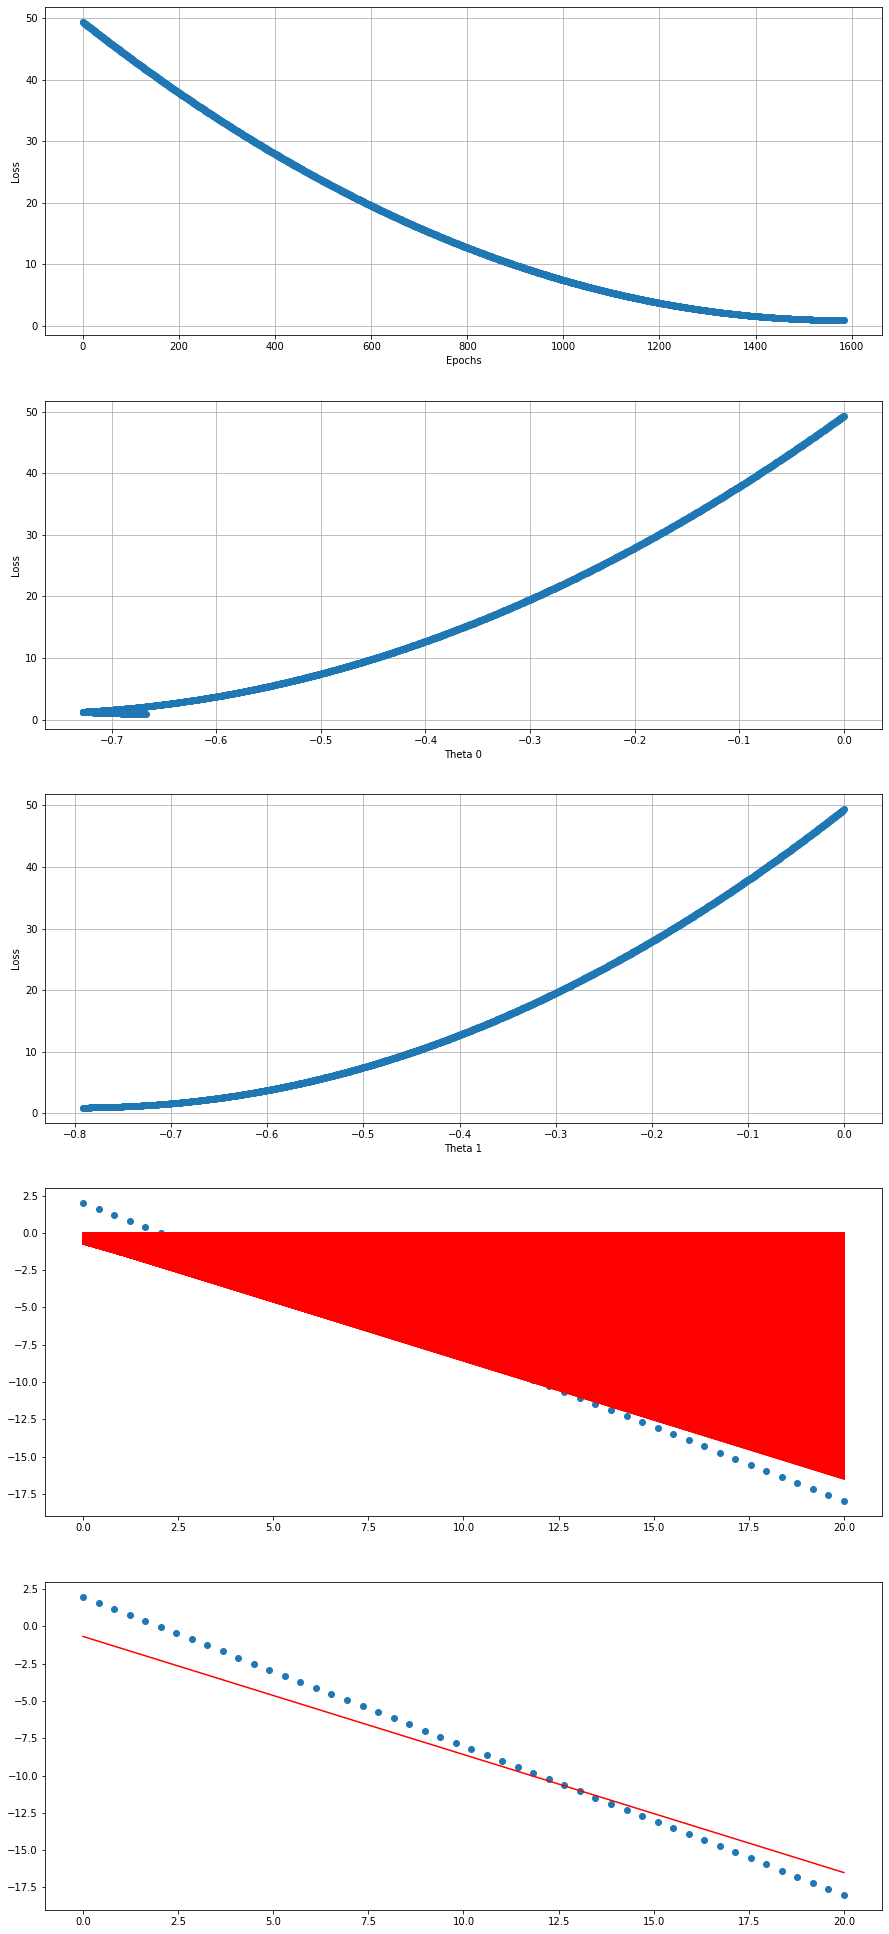

In [37]:
plot_visuals(X, y, loss, theta_0s, theta_1s, all_hx)

##### The following results uses alpha = 0.001, beta1 = 0.9, beta2 = 0.99, epsilon =  1e-08, and max. iterations = 5000.

In [38]:
theta_0s, theta_1s, loss, all_hx = Adam(X, y, alpha=0.001, beta1=0.9, beta2=0.99, epsilon=1e-08, epochs=5000)

****************** Training Report ********************
Gradient Descent converged after 1063 iterations
theta_0_Opt :  -0.6038841252843627
theta_1_Opt :  -0.7898849886143811
Cost =  0.8922089126772491


In [39]:
r2_score(y, all_hx[-1])

0.9485667803280174

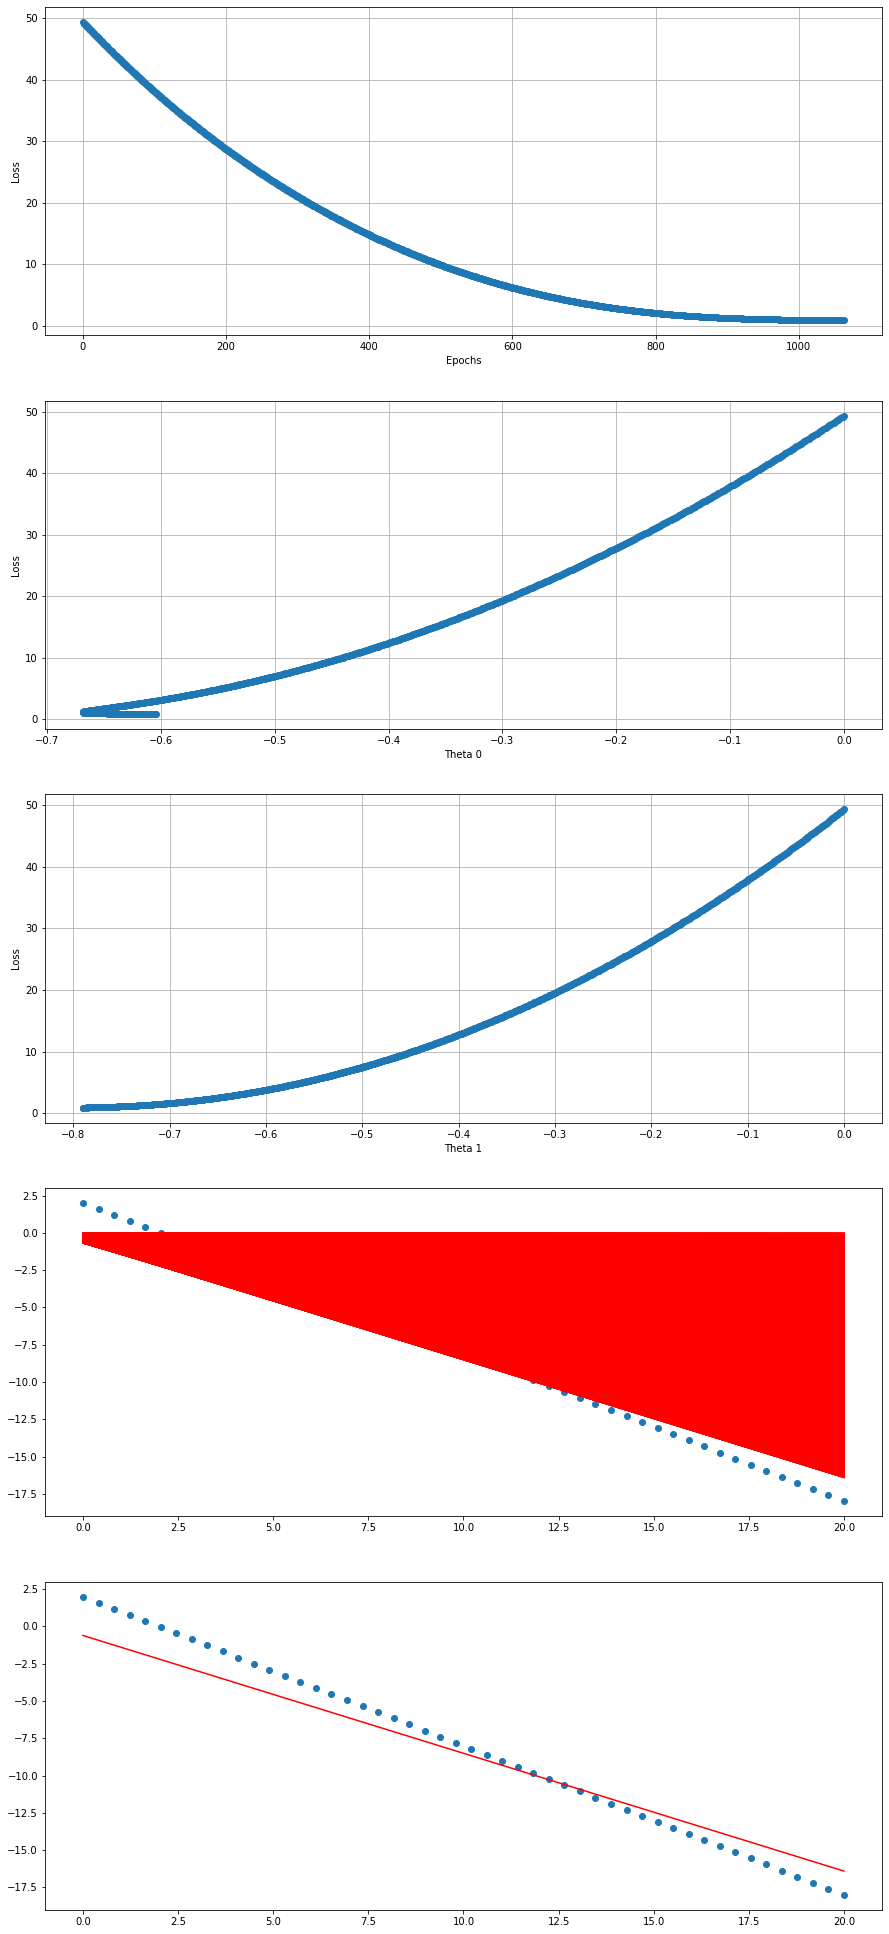

In [40]:
plot_visuals(X, y, loss, theta_0s, theta_1s, all_hx)

##### The following results uses alpha = 0.001, beta1 = 0.9, beta2 = 0.5, epsilon =  1e-08, and max. iterations = 5000.

In [41]:
theta_0s, theta_1s, loss, all_hx = Adam(X, y, alpha=0.001, beta1=0.9, beta2=0.5, epsilon=1e-08, epochs=5000)

****************** Training Report ********************
Gradient Descent converged after 759 iterations
theta_0_Opt :  -0.7389126908981526
theta_1_Opt :  -0.8005912090366055
Cost =  0.96716332487142


In [42]:
r2_score(y, all_hx[-1])

0.944245878919177

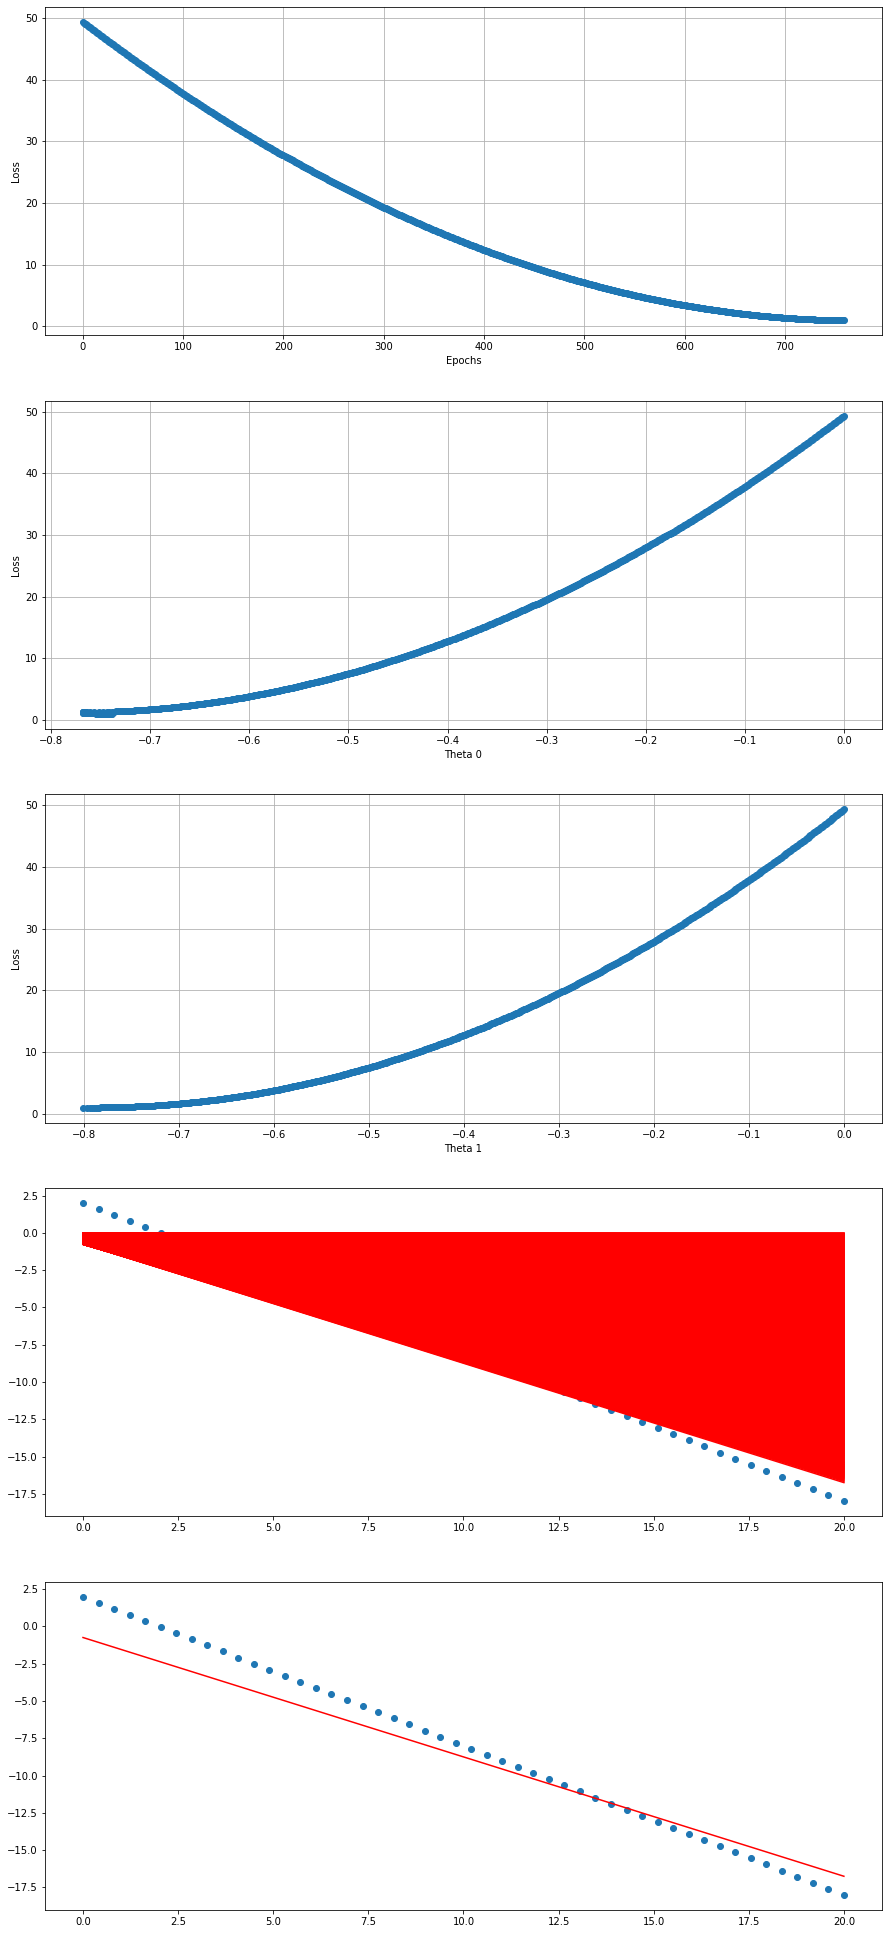

In [43]:
plot_visuals(X, y, loss, theta_0s, theta_1s, all_hx)

##### The following results uses alpha = 0.001, beta1 = 0.5, beta2 = 0.99, epsilon =  1e-08, and max. iterations = 5000.

In [44]:
theta_0s, theta_1s, loss, all_hx = Adam(X, y, alpha=0.001, beta1=0.5, beta2=0.99, epsilon=1e-08, epochs=5000)

****************** Training Report ********************
Gradient Descent converged after 1090 iterations
theta_0_Opt :  -0.584078150030362
theta_1_Opt :  -0.791471558775119
Cost =  0.8787138041745736


In [45]:
r2_score(y, all_hx[-1])

0.949344733641701

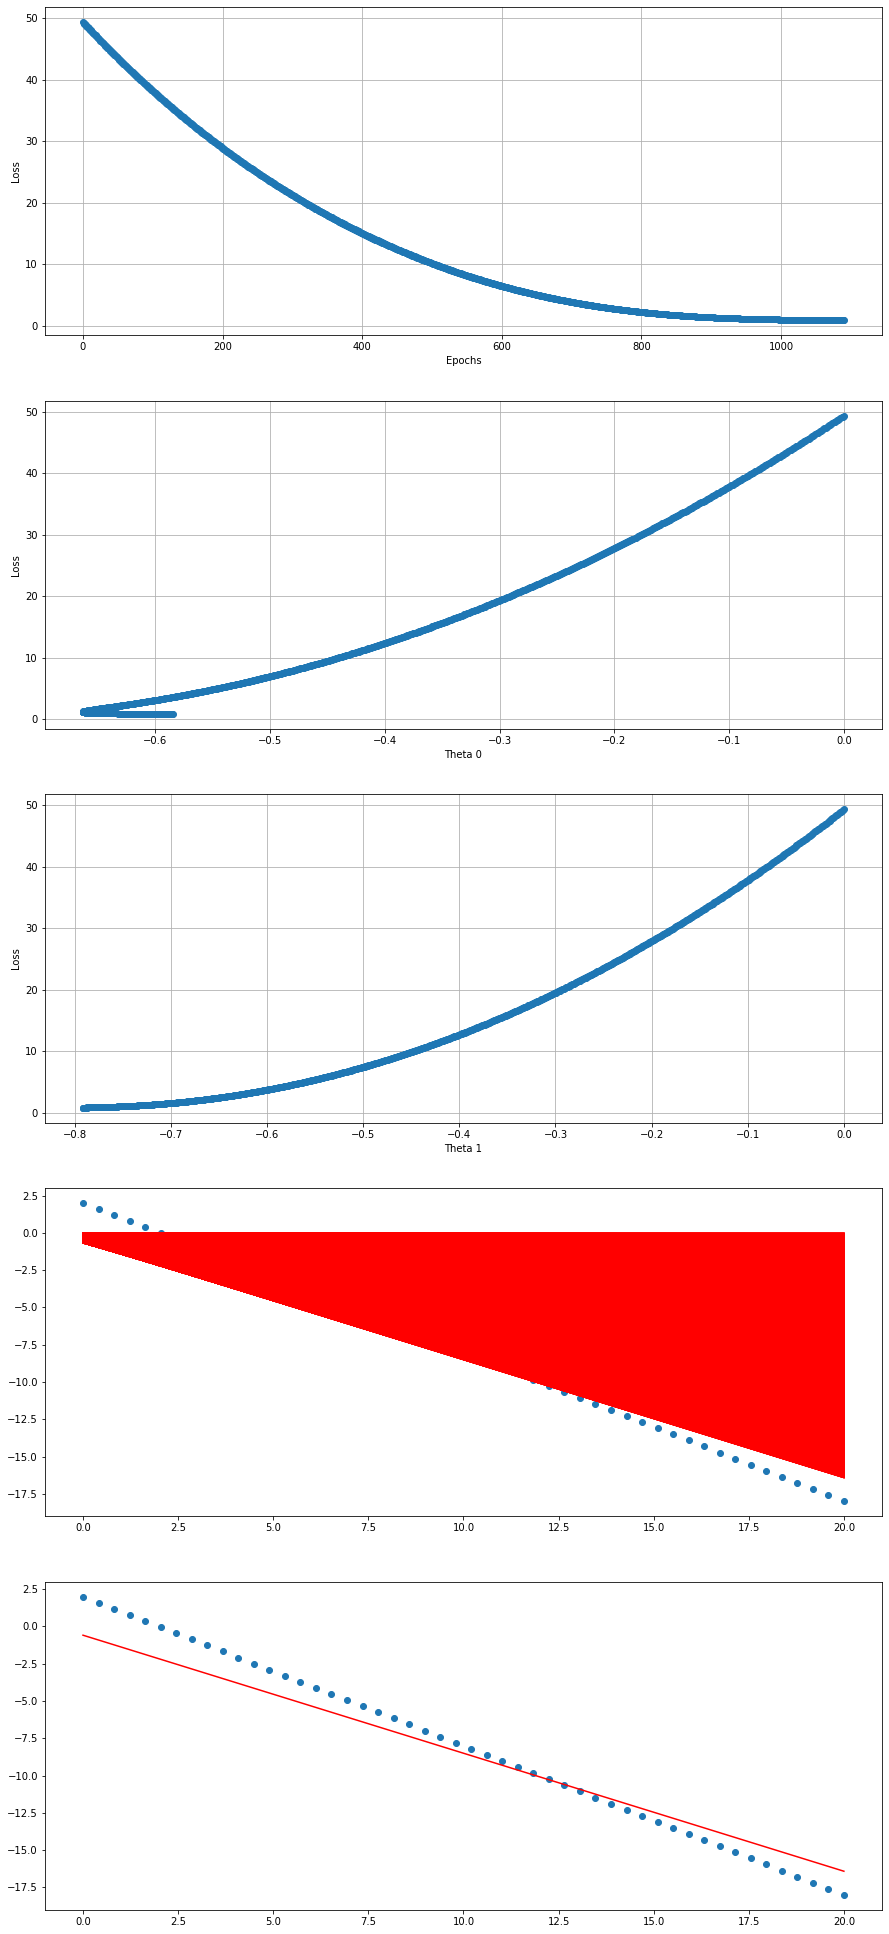

In [46]:
plot_visuals(X, y, loss, theta_0s, theta_1s, all_hx)

##### The following results uses alpha = 0.01, beta1 = 0.9, beta2 = 0.99, epsilon =  1e-08, and max. iterations = 5000.

In [56]:
theta_0s, theta_1s, loss, all_hx = Adam(X, y, alpha=0.9, beta1=0.6, beta2=0.99, epsilon=1e-08, epochs=5000)

****************** Training Report ********************
Gradient Descent converged after 32 iterations
theta_0_Opt :  1.878277895799342
theta_1_Opt :  -0.9908214042434651
Cost =  0.001909507397942484


In [57]:
r2_score(y, all_hx[-1])

0.9998899225147069

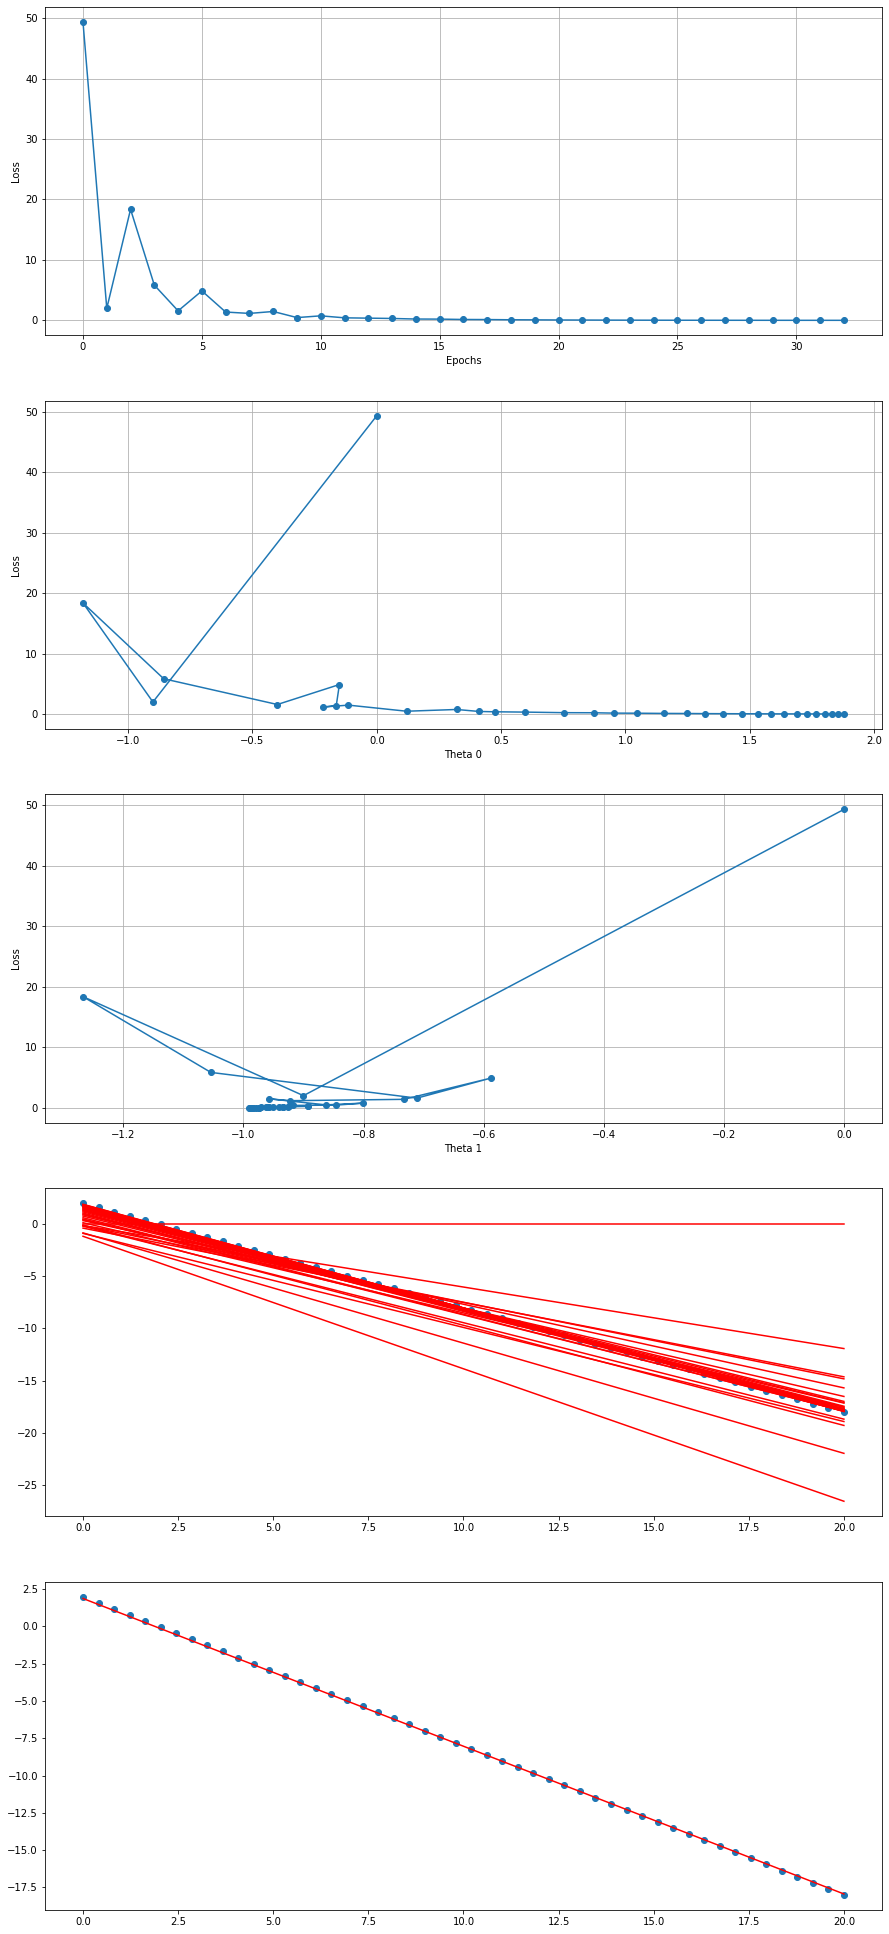

In [58]:
plot_visuals(X, y, loss, theta_0s, theta_1s, all_hx)